Uniform mesh N=99: h=0.0200
Non-uniform mesh (center clustered) N=49:
  Min dx (around center): 1.2007e-02
  Max dx (at boundaries): 1.1368e-01


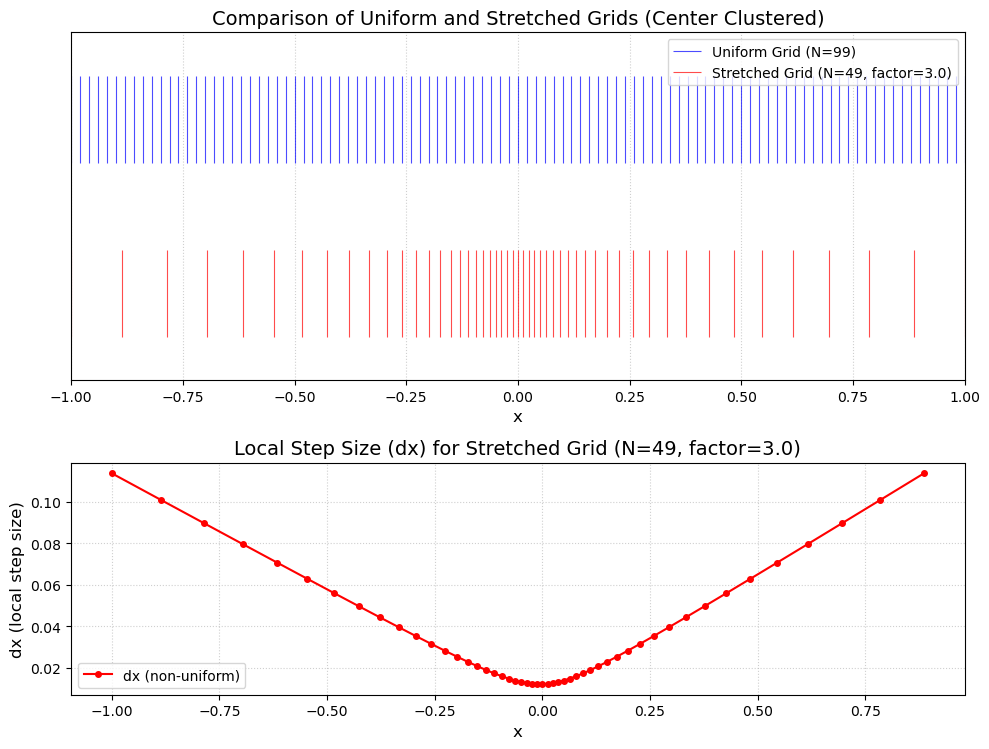

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def create_center_stretched_mesh(N, a, b, stretch_factor):
    # Create a uniform computational grid eta in [-1, 1]
    eta = np.linspace(-1, 1, N + 2)

    x_physical = (b-a)/2 * np.tanh(stretch_factor * eta) / np.tanh(stretch_factor)

    x_physical = (a + b) / 2 + (b - a) / 2 * np.sinh(stretch_factor * eta) / np.sinh(stretch_factor)
    return x_physical


# --- Demonstration of non-uniform mesh ---
a, b = -1, 1
N_uniform = 99
N_nonuniform = 49
stretch_factor_center_cluster = 3.0 # A positive value will cluster at center for sinh.

# Generate uniform mesh for comparison
xi_uniform = np.linspace(a, b, N_uniform + 2)
h_uniform = (b-a)/(N_uniform+1)
print(f"Uniform mesh N={N_uniform}: h={h_uniform:.4f}")

# Generate non-uniform mesh that clusters at x=0
xi_nonuniform_center_cluster = create_center_stretched_mesh(N_nonuniform, a, b, stretch_factor_center_cluster)
print(f"Non-uniform mesh (center clustered) N={N_nonuniform}:")
print(f"  Min dx (around center): {np.min(np.diff(xi_nonuniform_center_cluster)):.4e}")
print(f"  Max dx (at boundaries): {np.max(np.diff(xi_nonuniform_center_cluster)):.4e}")


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 2]})

# Main plot: Comparison of Grid Points
ax1.vlines(xi_uniform, 0.4, 0.6, color='blue', alpha=0.7, label=f'Uniform Grid (N={N_uniform})', linewidth=0.8)
ax1.vlines(xi_nonuniform_center_cluster, 0.0, 0.2, color='red', alpha=0.7, label=f'Stretched Grid (N={N_nonuniform}, factor={stretch_factor_center_cluster})', linewidth=0.8)

ax1.set_yticks([]) # Hide y-axis ticks
ax1.set_xlabel('x', fontsize=12)
ax1.set_title('Comparison of Uniform and Stretched Grids (Center Clustered)', fontsize=14)
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.set_xlim(a, b)
ax1.set_ylim(-0.1, 0.7) # Adjust y-limits for better visual separation

# # Inset plot: Zoomed in view around x=0
# ax_inset = fig.add_axes([0.3, 0.6, 0.25, 0.25]) # [left, bottom, width, height] in figure coordinates
# ax_inset.vlines(xi_uniform, 0.9, 1.1, color='blue', alpha=0.7, linewidth=0.8)
# ax_inset.vlines(xi_nonuniform_center_cluster, 0.0, 0.2, color='red', alpha=0.7, linewidth=0.8)
# ax_inset.set_xlim(-0.1, 0.1) # Zoom in to a small region around 0
# ax_inset.set_ylim(-0.1, 1.2)
# ax_inset.set_yticks([])
# ax_inset.set_xticks([-0.1, 0, 0.1])
# ax_inset.set_title('Zoom at x=0', fontsize=10)
# ax_inset.grid(True, linestyle=':', alpha=0.6)


# Plotting the spacing (dx) for the non-uniform grid
ax2.plot(xi_nonuniform_center_cluster[:-1], np.diff(xi_nonuniform_center_cluster), '-o', markersize=4, label='dx (non-uniform)', color='red')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('dx (local step size)', fontsize=12)
ax2.set_title(f'Local Step Size (dx) for Stretched Grid (N={N_nonuniform}, factor={stretch_factor_center_cluster})', fontsize=14)
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

<>:161: SyntaxWarning: invalid escape sequence '\p'
<>:161: SyntaxWarning: invalid escape sequence '\p'
C:\Users\niroj\AppData\Local\Temp\ipykernel_15364\2648492634.py:161: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f'Convergence Test for $\partial u/\partial x$ at $x=0$ (Non-Uniform Grid, Q3)', fontsize=14)


N        min_dx       max_dx       Est. du/dx         Abs. Error      Rel. Error     
-------------------------------------------------------------------------------------
99       0.005993     0.058534     -86.016106         6.598905e+01    4.341238e-01   
299      0.001997     0.019901     -122.915515        2.908965e+01    1.913728e-01   
399      0.001497     0.014963     -129.188333        2.281683e+01    1.501056e-01   
799      0.000749     0.007509     -139.715874        1.228929e+01    8.084782e-02   
1599     0.000374     0.003762     -145.602240        6.402920e+00    4.212304e-02   
3199     0.000187     0.001883     -148.733196        3.271964e+00    2.152535e-02   


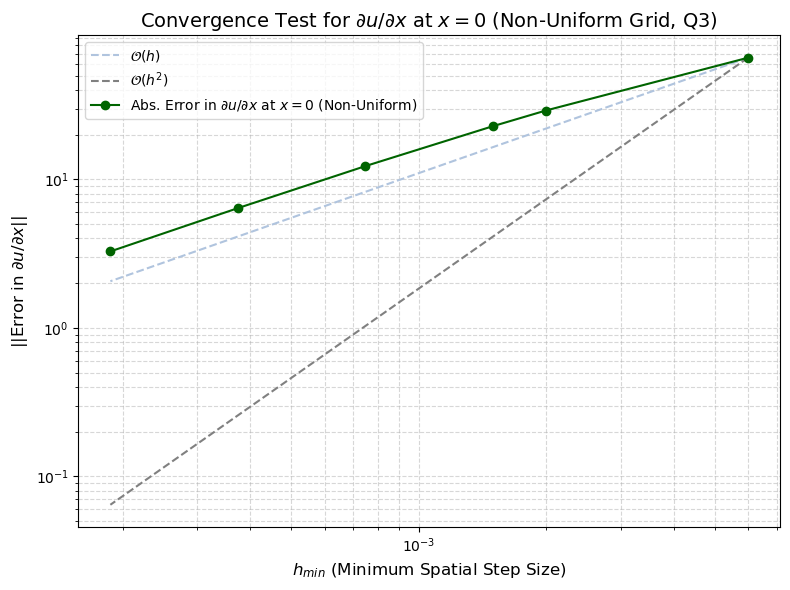


--- Numerical Convergence Rates (Non-Uniform Grid) ---
N=99       h_min=0.005993     Abs. Error=6.598905e+01   
N=299      h_min=0.001997     Abs. Error=2.908965e+01    Rate=0.7452
N=399      h_min=0.001497     Abs. Error=2.281683e+01    Rate=0.8442
N=799      h_min=0.000749     Abs. Error=1.228929e+01    Rate=0.8927
N=1599     h_min=0.000374     Abs. Error=6.402920e+00    Rate=0.9406
N=3199     h_min=0.000187     Abs. Error=3.271964e+00    Rate=0.9686


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function Definitions ---

# Define the initial condition function for Q3
def eta(x):
    return -np.sin(np.pi * x)

# Function to create a mesh that clusters points around x=0 (center)
def create_center_stretched_mesh(N, a, b, stretch_factor):
    eta = np.linspace(-1, 1, N + 2) # Uniform computational grid
    # Using sinh for clustering at the center
    x_physical = (a + b) / 2 + (b - a) / 2 * np.sinh(stretch_factor * eta) / np.sinh(stretch_factor)
    return x_physical

# Adapted vectorized step function for NON-UNIFORM grids
def step_vectorized_nonuniform(u, dt, xi, eps):
    u_new = u.copy()
    
    # Calculate local grid spacings
    dx_left = np.diff(xi)[:-1] # dx_{i-1} for point i, so xi[i] - xi[i-1]
    dx_right = np.diff(xi)[1:]  # dx_i for point i, so xi[i+1] - xi[i]
    
    # Calculate terms for interior points (from index 1 to N)
    # Note: u[1:-1] are the interior points, dx_left corresponds to u[1:-1]
    # and dx_right corresponds to u[1:-1]

    # --- Advection Term (Upwind for Burger's) ---
    advection_term_val = np.zeros_like(u[1:-1])

    # Case 1: u[i] >= 0 (flow from left) -> use (u[i] - u[i-1]) / dx_{i-1}
    mask_pos = (u[1:-1] >= 0)
    advection_term_val[mask_pos] = u[1:-1][mask_pos] * (u[1:-1][mask_pos] - u[:-2][mask_pos]) / dx_left[mask_pos]

    # Case 2: u[i] < 0 (flow from right) -> use (u[i+1] - u[i]) / dx_i
    mask_neg = (u[1:-1] < 0)
    advection_term_val[mask_neg] = u[1:-1][mask_neg] * (u[2:][mask_neg] - u[1:-1][mask_neg]) / dx_right[mask_neg]

    # --- Diffusion Term (Non-Uniform Central Difference) ---
    # Formula: 2 / (dx_i + dx_{i-1}) * [ (u_{i+1} - u_i) / dx_i - (u_i - u_{i-1}) / dx_{i-1} ]
    
    # Term 1: (u_{i+1} - u_i) / dx_i
    term1_diff = (u[2:] - u[1:-1]) / dx_right
    # Term 2: (u_i - u_{i-1}) / dx_{i-1}
    term2_diff = (u[1:-1] - u[:-2]) / dx_left

    diffusion_term_val = 2 / (dx_right + dx_left) * (term1_diff - term2_diff)

    # --- Update Interior Points using Forward Euler ---
    u_new[1:-1] = u[1:-1] - dt * advection_term_val + eps * dt * diffusion_term_val

    return u_new

# --- Convergence Study for Q3 (using Non-Uniform Grid) ---

# Target derivative value at x=0, t=1.6037/pi
target_derivative = -152.00516

# Parameters for Q3 (fixed)
eps_q3 = 0.01 / np.pi
t_final_q3 = 1.6037 / np.pi
Cr_adv = 0.8
Cr_diff = 0.5

# Non-uniform grid parameters
stretch_factor_center_cluster = 3.0 # Adjust this to control clustering

# Different N values to test for non-uniform grid
# Use smaller N values than uniform grid, aiming for comparable accuracy
N_values_nonuniform = [99, 299, 399, 799, 1599, 3199] # Start smaller, go higher if needed

hs_min = [] # Store minimum dx for the non-uniform grid (represents resolution at center)
errors_nonuniform = [] # Store absolute errors

print(f"{'N':<8} {'min_dx':<12} {'max_dx':<12} {'Est. du/dx':<18} {'Abs. Error':<15} {'Rel. Error':<15}")
print("-" * 85)

for N in N_values_nonuniform:
    # Spatial mesh for current N (non-uniform)
    a, b = -1, 1
    xi = create_center_stretched_mesh(N, a, b, stretch_factor_center_cluster)
    
    # Calculate local dx values
    local_dx = np.diff(xi)
    min_dx = np.min(local_dx)
    max_dx = np.max(local_dx)

    # Initial condition for Q3
    u = eta(xi)

    # Time iteration
    ti = 0.0
    u_current = u.copy()

    while ti < t_final_q3:
        # Recalculate time step for stability (using global max |u| and min dx)
        max_u_val = np.max(np.abs(u_current))
        
        # CFL for advection: dt <= Cr_adv * dx / |u_max|
        # CFL for diffusion: dt <= Cr_diff * dx^2 / (2*eps)
        # We must use the MINIMUM dx for stability criteria
        
        # Add small epsilon for robust division to prevent NaN/Inf
        dt_adv = Cr_adv * min_dx / max(max_u_val, 1e-10)
        dt_diff = Cr_diff * min_dx**2 / (2 * eps_q3)
        dt = min(dt_adv, dt_diff)

        # Make sure we don't overshoot the final time
        if ti + dt > t_final_q3:
            dt = t_final_q3 - ti

        # Apply homogeneous boundary conditions for Q3
        u_current[0] = 0.0
        u_current[-1] = 0.0

        # Update solution using the NON-UNIFORM vectorized step function
        u_current = step_vectorized_nonuniform(u_current, dt, xi, eps_q3)

        # Update time
        ti += dt

    # --- After simulation for current N, calculate derivative error ---
    # Find the index closest to x = 0
    idx_x0 = np.argmin(np.abs(xi - 0.0))

    # Calculate the spatial derivative using central difference at x=0
    # On non-uniform grid, the central difference uses (u[i+1] - u[i-1]) / (xi[i+1] - xi[i-1])
    numerical_derivative_at_x0 = np.nan # Initialize as NaN in case of error
    if idx_x0 > 0 and idx_x0 < len(xi) - 1:
        numerical_derivative_at_x0 = (u_current[idx_x0 + 1] - u_current[idx_x0 - 1]) / (xi[idx_x0 + 1] - xi[idx_x0 - 1])
    else:
        print(f"Warning: For N={N}, x=0 index {idx_x0} is at boundary. Derivative not calculated.")

    # Calculate errors
    absolute_error = np.abs(numerical_derivative_at_x0 - target_derivative)
    relative_error = absolute_error / np.abs(target_derivative) if np.abs(target_derivative) > 1e-10 else np.nan

    hs_min.append(min_dx) # Store minimum dx for plotting convergence
    errors_nonuniform.append(absolute_error)

    print(f"{N:<8} {min_dx:<12.6f} {max_dx:<12.6f} {numerical_derivative_at_x0:<18.6f} {absolute_error:<15.6e} {relative_error:<15.6e}")

# --- Plotting Convergence (using minimum dx as the 'h' for convergence) ---
plt.style.use('default')
plt.figure(figsize=(8, 6))

# Plot reference lines for O(h) and O(h^2)
# We plot against hs_min, and the y-axis is the error (absolute error)
# Scale O(h) line to pass through first point (coarsest min_dx)
error_h_scaling_factor = errors_nonuniform[0] / hs_min[0]
error_h2_scaling_factor = errors_nonuniform[0] / (hs_min[0]**2)

plt.loglog(hs_min, [error_h_scaling_factor * h_val**1 for h_val in hs_min], linestyle='--', label=r'$\mathcal{O}(h)$', color='lightsteelblue')
plt.loglog(hs_min, [error_h2_scaling_factor * h_val**2 for h_val in hs_min], linestyle='--', label=r'$\mathcal{O}(h^2)$', color='grey')
plt.loglog(hs_min, errors_nonuniform, linestyle='-', marker='o', label=r'Abs. Error in $\partial u/\partial x$ at $x=0$ (Non-Uniform)', color='darkgreen')

# Labels and legend
plt.xlabel(r'$h_{min}$ (Minimum Spatial Step Size)', fontsize=12)
plt.ylabel(r'$||\text{Error in } \partial u/\partial x||$', fontsize=12)
plt.title(f'Convergence Test for $\partial u/\partial x$ at $x=0$ (Non-Uniform Grid, Q3)', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=.5)
plt.tight_layout()
plt.show()

# Optional: Calculate and print numerical convergence rates
rates_nonuniform = []
for i in range(1, len(errors_nonuniform)):
    rate = np.log(errors_nonuniform[i-1] / errors_nonuniform[i]) / np.log(hs_min[i-1] / hs_min[i])
    rates_nonuniform.append(rate)

print("\n--- Numerical Convergence Rates (Non-Uniform Grid) ---")
for i, N_val in enumerate(N_values_nonuniform):
    if i == 0:
        print(f"N={N_val:<8} h_min={hs_min[i]:<12.6f} Abs. Error={errors_nonuniform[i]:<15.6e}")
    else:
        print(f"N={N_val:<8} h_min={hs_min[i]:<12.6f} Abs. Error={errors_nonuniform[i]:<15.6e} Rate={rates_nonuniform[i-1]:.4f}")

--- Running Uniform Grid Convergence ---

--- Running Non-Uniform Grid Convergence ---


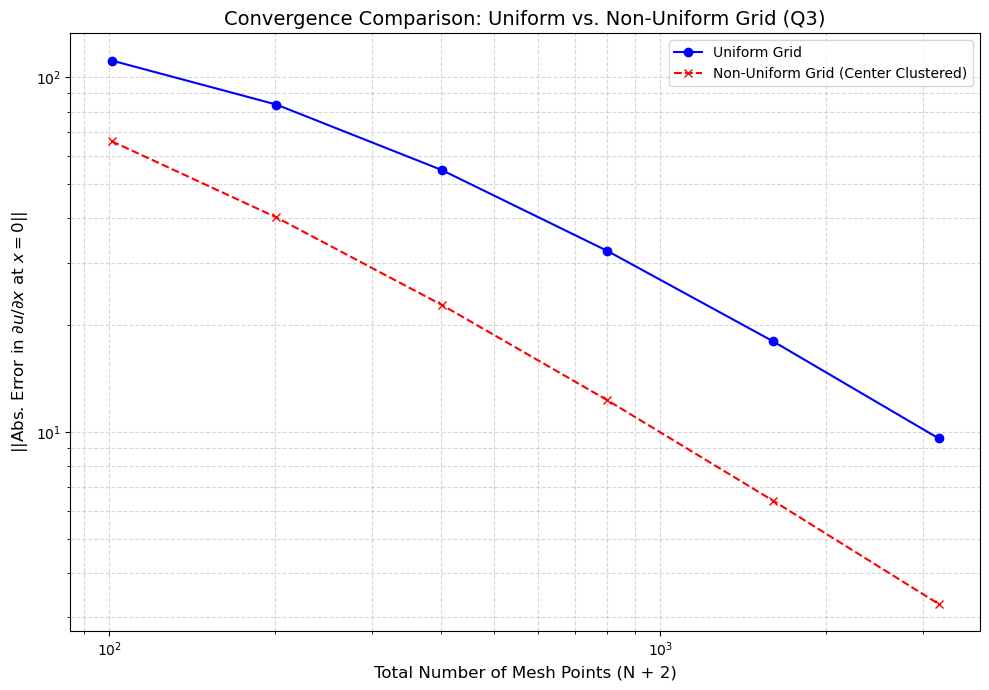


--- Summary Comparison ---
To achieve an Abs. Error of approximately 1.00e+00:
  Uniform Grid: N = 3201 points, Error = 9.5856e+00
  Non-Uniform Grid: N = 3201 points, Error = 3.2720e+00

This demonstrates that for a similar level of accuracy, the non-uniform grid typically requires fewer total mesh points.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Define the initial condition function for Q3
def eta(x):
    return -np.sin(np.pi * x)

# Vectorized step function for UNIFORM grids
def step_vectorized_uniform(u, dt, h, eps):
    u_new = u.copy()
    i = np.arange(1, len(u) - 1)

    advection_term_val = np.zeros_like(u[1:-1])
    mask_pos = (u[1:-1] >= 0)
    advection_term_val[mask_pos] = u[1:-1][mask_pos] * (u[1:-1][mask_pos] - u[:-2][mask_pos])
    mask_neg = (u[1:-1] < 0)
    advection_term_val[mask_neg] = u[1:-1][mask_neg] * (u[2:][mask_neg] - u[1:-1][mask_neg])

    diffusion_term_val = (u[2:] - 2*u[1:-1] + u[:-2])

    u_new[1:-1] = u[1:-1] - (dt / h) * advection_term_val + (eps * dt / h**2) * diffusion_term_val
    return u_new

# Function to create a mesh that clusters points around x=0 (center)
def create_center_stretched_mesh(N, a, b, stretch_factor):
    eta = np.linspace(-1, 1, N + 2) # Uniform computational grid in [-1, 1]
    # Using sinh for clustering at the center
    x_physical = (a + b) / 2 + (b - a) / 2 * np.sinh(stretch_factor * eta) / np.sinh(stretch_factor)
    return x_physical

# Adapted vectorized step function for NON-UNIFORM grids
def step_vectorized_nonuniform(u, dt, xi, eps):
    u_new = u.copy()
    
    dx_left = np.diff(xi)[:-1] # dx_{i-1} for point i, so xi[i] - xi[i-1]
    dx_right = np.diff(xi)[1:]  # dx_i for point i, so xi[i+1] - xi[i]

    advection_term_val = np.zeros_like(u[1:-1])
    mask_pos = (u[1:-1] >= 0)
    advection_term_val[mask_pos] = u[1:-1][mask_pos] * (u[1:-1][mask_pos] - u[:-2][mask_pos]) / dx_left[mask_pos]
    mask_neg = (u[1:-1] < 0)
    advection_term_val[mask_neg] = u[1:-1][mask_neg] * (u[2:][mask_neg] - u[1:-1][mask_neg]) / dx_right[mask_neg]

    term1_diff = (u[2:] - u[1:-1]) / dx_right
    term2_diff = (u[1:-1] - u[:-2]) / dx_left
    diffusion_term_val = 2 / (dx_right + dx_left) * (term1_diff - term2_diff)

    u_new[1:-1] = u[1:-1] - dt * advection_term_val + eps * dt * diffusion_term_val
    return u_new

# --- Common Parameters for Q3 ---
target_derivative = -152.00516
eps_q3 = 0.01 / np.pi
t_final_q3 = 1.6037 / np.pi
Cr_adv = 0.8
Cr_diff = 0.5
a, b = -1, 1

# --- Run Uniform Grid Convergence Test ---
N_values_uniform = [99, 199, 399, 799, 1599, 3199]
hs_uniform = []
errors_uniform = []
Ns_uniform_plot = [] # For plotting against N

print("--- Running Uniform Grid Convergence ---")
for N_uni in N_values_uniform:
    h = (b - a) / (N_uni + 1)
    xi = np.linspace(a, b, N_uni + 2)
    u = eta(xi)
    ti = 0.0
    u_current = u.copy()

    while ti < t_final_q3:
        max_u_val = np.max(np.abs(u_current))
        dt_adv = Cr_adv * h / max(max_u_val, 1e-10)
        dt_diff = Cr_diff * h**2 / (2 * eps_q3)
        dt = min(dt_adv, dt_diff)
        if ti + dt > t_final_q3: dt = t_final_q3 - ti
        
        u_current[0] = 0.0
        u_current[-1] = 0.0
        u_current = step_vectorized_uniform(u_current, dt, h, eps_q3)
        ti += dt

    idx_x0 = np.argmin(np.abs(xi - 0.0))
    numerical_derivative_at_x0 = (u_current[idx_x0 + 1] - u_current[idx_x0 - 1]) / (2 * h)
    absolute_error = np.abs(numerical_derivative_at_x0 - target_derivative)
    
    hs_uniform.append(h) # For reference
    errors_uniform.append(absolute_error)
    Ns_uniform_plot.append(N_uni + 2) # Total points N+2

    # print(f"Uniform N={N_uni}, h={h:.4e}, Error={absolute_error:.4e}") # Uncomment for detailed print

# --- Run Non-Uniform Grid Convergence Test ---
stretch_factor_center_cluster = 3.0
N_values_nonuniform = [99, 199, 399, 799, 1599, 3199] # Adjust N as needed
hs_min_nonuniform = []
errors_nonuniform = []
Ns_nonuniform_plot = [] # For plotting against N

print("\n--- Running Non-Uniform Grid Convergence ---")
for N_nonuni in N_values_nonuniform:
    xi = create_center_stretched_mesh(N_nonuni, a, b, stretch_factor_center_cluster)
    local_dx = np.diff(xi)
    min_dx = np.min(local_dx)
    
    u = eta(xi)
    ti = 0.0
    u_current = u.copy()

    while ti < t_final_q3:
        max_u_val = np.max(np.abs(u_current))
        dt_adv = Cr_adv * min_dx / max(max_u_val, 1e-10)
        dt_diff = Cr_diff * min_dx**2 / (2 * eps_q3)
        dt = min(dt_adv, dt_diff)
        if ti + dt > t_final_q3: dt = t_final_q3 - ti
        
        u_current[0] = 0.0
        u_current[-1] = 0.0
        u_current = step_vectorized_nonuniform(u_current, dt, xi, eps_q3)
        ti += dt

    idx_x0 = np.argmin(np.abs(xi - 0.0))
    numerical_derivative_at_x0 = (u_current[idx_x0 + 1] - u_current[idx_x0 - 1]) / (xi[idx_x0 + 1] - xi[idx_x0 - 1])
    absolute_error = np.abs(numerical_derivative_at_x0 - target_derivative)
    
    hs_min_nonuniform.append(min_dx) # For reference
    errors_nonuniform.append(absolute_error)
    Ns_nonuniform_plot.append(N_nonuni + 2) # Total points N+2

    # print(f"Non-Uniform N={N_nonuni}, min_dx={min_dx:.4e}, Error={absolute_error:.4e}") # Uncomment for detailed print

# --- Plotting Both Convergence Curves on the Same Graph (Error vs. Total N) ---
plt.style.use('default')
plt.figure(figsize=(10, 7))

plt.loglog(Ns_uniform_plot, errors_uniform, linestyle='-', marker='o', label='Uniform Grid', color='blue')
plt.loglog(Ns_nonuniform_plot, errors_nonuniform, linestyle='--', marker='x', label='Non-Uniform Grid (Center Clustered)', color='red')

# Labels and legend
plt.xlabel('Total Number of Mesh Points (N + 2)', fontsize=12)
plt.ylabel(r'$||\text{Abs. Error in } \partial u/\partial x \text{ at } x=0||$', fontsize=12)
plt.title(f'Convergence Comparison: Uniform vs. Non-Uniform Grid (Q3)', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=.5)
plt.tight_layout()
plt.show()
